# Data Management and Visualization

### 0. Import Data

In [2]:
import pandas as pd

In [6]:
coupon = pd.read_excel("http://byungwan.com/class/Coupon_Sample.xlsx")

In [7]:
coupon.head()

,CID,Gender,Age,CClass,Discount,Visits,Email,SMS,MStatus,Purchases,Sales
0,1,0,41,2,0,1,0,1,1,1,0.92
1,2,0,41,1,0,0,0,0,0,0,0.00
2,3,0,30,2,0,3,0,0,0,1,1.54
3,4,0,28,2,0,2,0,0,0,2,0.88
4,5,1,24,2,1,5,0,0,0,2,0.53


### 1. Summary statistics

In [8]:
coupon.describe()

,CID,Gender,Age,CClass,Discount,Visits,Email,SMS,MStatus,Purchases,Sales
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.741483,0.258517,27.853707,1.759519,0.244489,3.392786,0.184369,0.228457,0.102204,1.218437,0.664738
std,144.525784,0.438259,7.346600,0.480842,0.430215,5.812156,0.388174,0.420260,0.303221,1.399362,0.918000
min,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.500000,0.000000,23.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,251.000000,0.000000,27.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.390000
75%,375.500000,1.000000,31.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.862500
max,500.000000,1.000000,56.000000,3.000000,1.000000,77.000000,1.000000,1.000000,1.000000,12.000000,8.530800


In [10]:
# if max is 1, min 0, highly likely to be a dummy variable
# 25% --> among the whole data set, 25% are 1, 75% are 0

### 2. Measure of shape

In [15]:
# Get Sales -> use pyplot to get the plot

from matplotlib import pyplot as plt

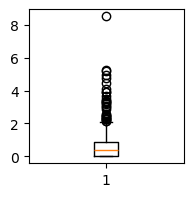

In [18]:
plt.figure(figsize=(2,2))
plt.boxplot(coupon["Sales"])
plt.show()

In [21]:
# orange -> average, box -> standard deviation, circle -> outliers
# maybe it is right skewed

# Measures of shape
## Negatively skewed -> mean < median < mode
## Positively skewed -> mode < median < mean

In [22]:
import statistics as stat

In [23]:
stat.median(coupon["Sales"])

0.39

In [26]:
stat.mode(coupon["Sales"])

0.0

(array([372.,  79.,  29.,   8.,   5.,   3.,   2.,   0.,   0.,   1.]),
 array([0.     , 0.85308, 1.70616, 2.55924, 3.41232, 4.2654 , 5.11848,
        5.97156, 6.82464, 7.67772, 8.5308 ]),
 <BarContainer object of 10 artists>)

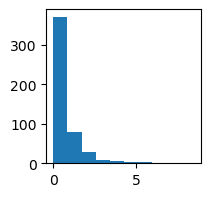

In [29]:
plt.figure(figsize=(2,2))
plt.hist(coupon["Sales"])

# check that the histogram is right skewed

In [30]:
from scipy.stats import skew

In [32]:
skew(coupon["Sales"])

# positive -> right skewed / negative -> left skewed

np.float64(3.1778810492661735)

### 3. Correlation

In [33]:
# relationship between two variables

# close to 1 -> positive correlation, close to -1 -> negative correlation
# close to 0 -> there is no linear correlation between two variables

In [35]:
# corr : gives pairwise correlation
corrs = coupon.corr()
corrs

,CID,Gender,Age,CClass,Discount,Visits,Email,SMS,MStatus,Purchases,Sales
CID,1.000000,-0.044436,-0.070519,-0.053832,0.019944,-0.040845,0.040116,0.040845,-0.020428,-0.087620,-0.053830
Gender,-0.044436,1.000000,-0.180944,0.038325,0.058159,0.095647,0.014358,0.103890,-0.093449,0.064901,-0.000506
Age,-0.070519,-0.180944,1.000000,0.031517,0.039929,-0.107284,-0.008127,0.034260,0.336644,0.016397,0.067607
CClass,-0.053832,0.038325,0.031517,1.000000,0.343030,0.324143,-0.020180,0.023996,-0.065219,0.561676,0.521242
Discount,0.019944,0.058159,0.039929,0.343030,1.000000,0.024156,0.066218,0.101381,-0.038005,0.144594,-0.001988
Visits,-0.040845,0.095647,-0.107284,0.324143,0.024156,1.000000,-0.083785,-0.040921,-0.041055,0.602211,0.550020
Email,0.040116,0.014358,-0.008127,-0.020180,0.066218,-0.083785,1.000000,0.282888,0.027249,-0.070593,-0.114844
SMS,0.040845,0.103890,0.034260,0.023996,0.101381,-0.040921,0.282888,1.000000,0.005495,-0.013323,-0.008586
MStatus,-0.020428,-0.093449,0.336644,-0.065219,-0.038005,-0.041055,0.027249,0.005495,1.000000,-0.038523,-0.001104
Purchases,-0.087620,0.064901,0.016397,0.561676,0.144594,0.602211,-0.070593,-0.013323,-0.038523,1.000000,0.829242


In [38]:
# pyplot, seaborn => in order to draw heatmap we need these assets
import seaborn as sns

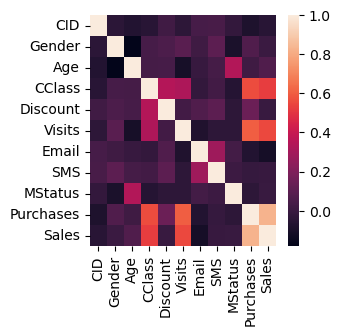

In [40]:
plt.figure(figsize = (3,3))
sns.heatmap(corrs)
plt.show()

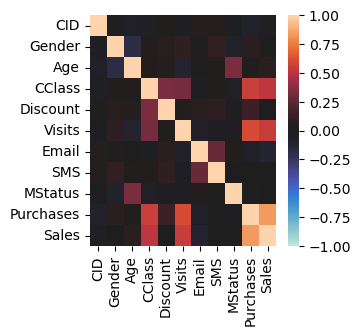

In [41]:
plt.figure(figsize = (3,3))
sns.heatmap(corrs, vmin=-1, vmax=1, center=0)
plt.show()

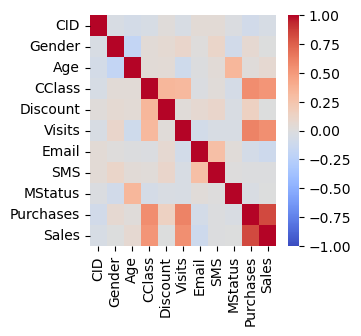

In [43]:
plt.figure(figsize = (3,3))
sns.heatmap(corrs, vmin=-1, vmax=1, center=0, cmap="coolwarm")
plt.show()

# use cmap to adjust the colors

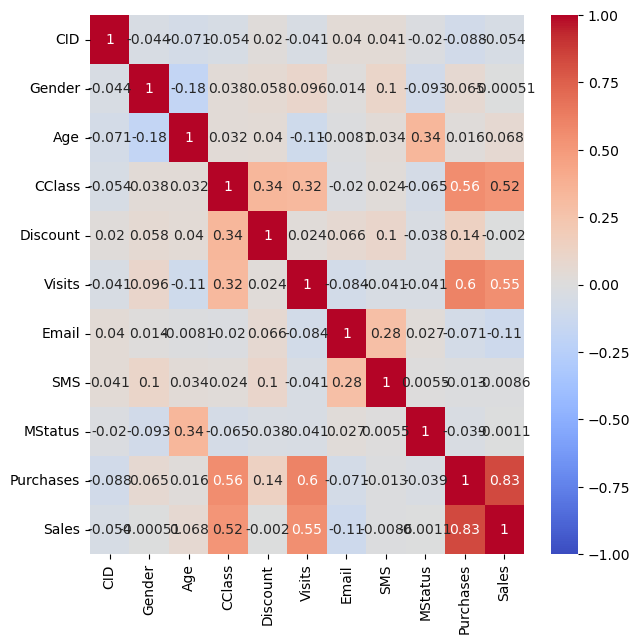

In [45]:
plt.figure(figsize = (7,7))
sns.heatmap(corrs, vmin=-1, vmax=1, center=0, cmap="coolwarm", annot=True)
plt.show()

# annot -> see the actual numbers 